## Graph #3: The Scale-Location Plot

We have seen in an earlier lesson how the residuals vs fits plot can help to spot problematic heteroskedasticity ("uneven variance") in our data. However, sometimes it can be difficult to spot heteroskedasticity using the residuals vs fits plot alone. For example, considering the following dataset:

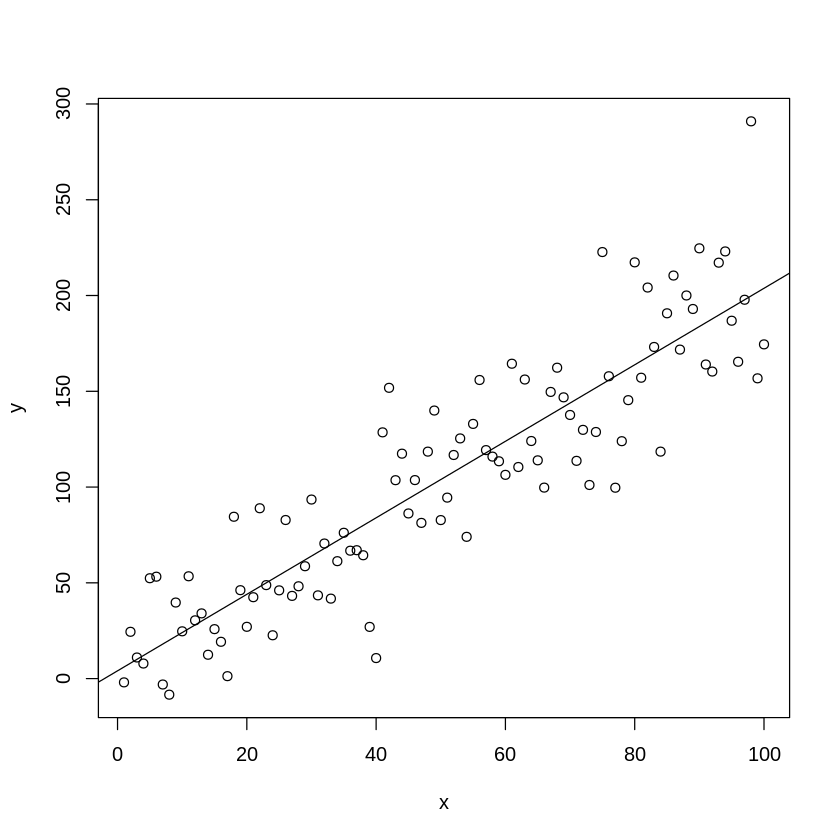

In [1]:
scale.location.df <- read.csv("data/scale-location.csv")
plot(y ~ x, data=scale.location.df)
model <- lm(y ~ x, data=scale.location.df)
abline(model)

If we examine the residuals vs. fits plot, it is very hard to spot the heteroskedasticity that we are searching for:

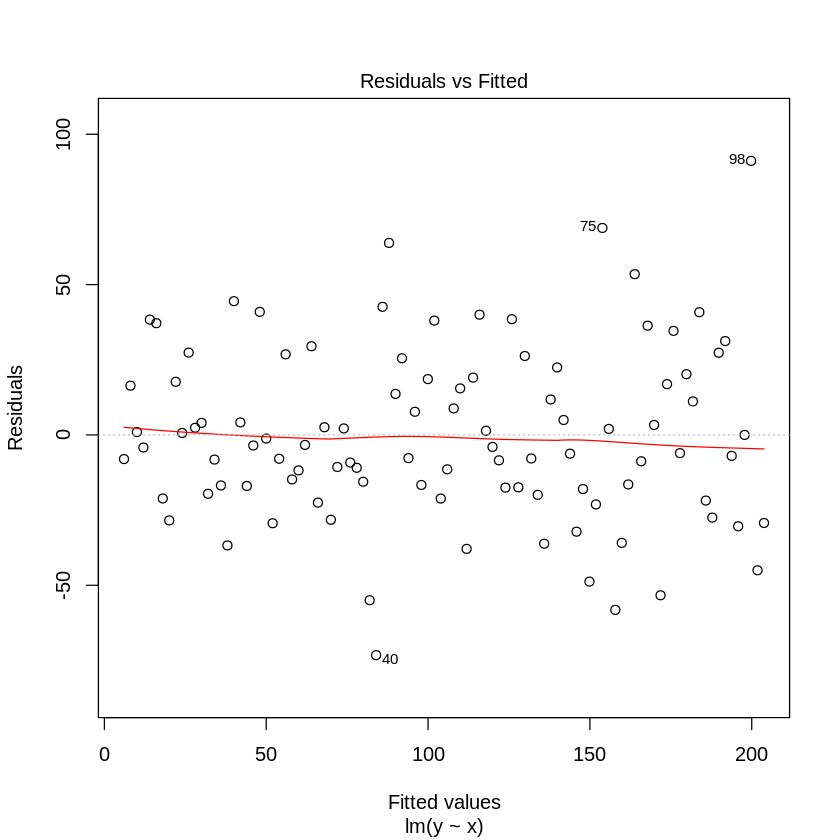

In [2]:
plot(model, which=1)

To help with these sorts of murky situations, R provides us with the `Scale-Location` plot, which we can access as follows:

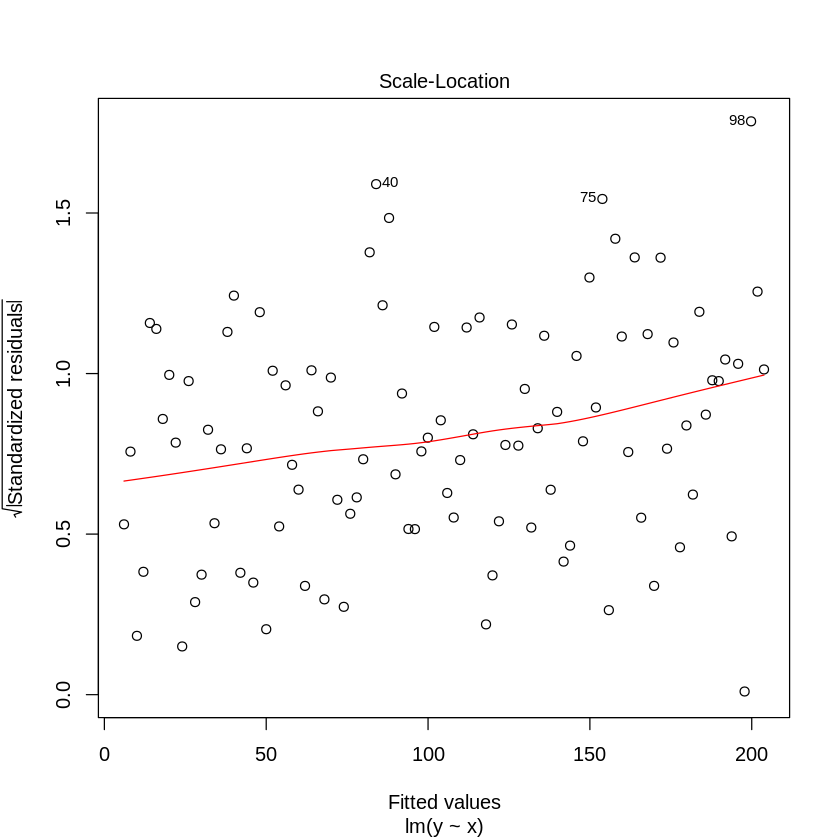

In [3]:
plot(model, which=3)

Before discussing how the `Scale-Location` plot works, we'll "skip to the end" and just tell you how the plot above indicates the presence of heteroskedasticity. In the `Scale-Location` plot, a flat smoothing line (the red line) indicates no heteroskedasticity. In contrast, the upward-sloping red line shown in the figure above is a clear indication of heteroskedasticity, and therefore clearly tells us that we should be very careful not to place too much trust in the predictions of our model. 

The `Scale-Location` plot has several special features that make it easier to spot heteroskedasticity. Notice that the `y` axis displays the square root of the absolute value of the Standardized Residuals. That statement is quite a mouthful, so let's tackle it by breaking it into pieces: 

1. The "Standardized Residuals" are simply the normal residuals scaled by an appropriate factor to make their scale independent of our `y` variables units - they also have some other nice properties, but those are not important to us now. Using the standardized residuals gives our plots a nice, consistent appearance that makes them easier to interpret. 
2. Taking the absolute value of the standardized residuals places the zero line at the *bottom* of the graph, rather than in the middle (as in the residuals vs. fits plot) because it converts all negative values into positive values. As the variance increases as we move from left to right (due to heteroskedasticity), we will observe more large *positive* values, rather than a mix of larger magnitude positive and negative values scattered around the *x* axis as we observe in the residuals vs. fits plot. 
3. Taking the square root of the quantity above "pulls in" the points and helps us to see the patterns we are looking for. 

Again, the bottom line is this: if you observe a strong non-zero slope in the red smoothing line within your Scale-Location plot, this is an indication of heteroskedasticity in your data and you should be appropriately cautious in trusting the results derived from your linear model.

<span style="color:blue;font-weight:bold">Exercise</span>: Let's take a look at a less clear-cut case. Start with the code from the previous lesson that we have reproduced for you below. 
Then perform the following steps:

* Create a Scale-Location plot for `DailySalesContainers ~ DailyHighTemperatureC`
* Based on this plot, assign the variable `is.heteroskedasticity` a value of `"YES"`, `"NO"`, or `"MAYBE"`

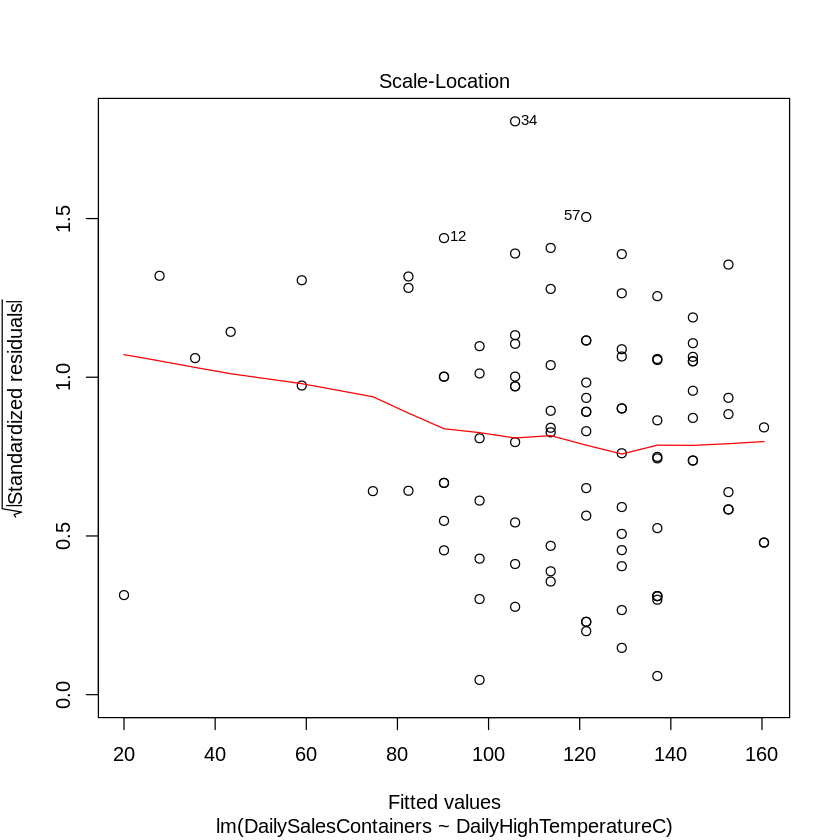

In [6]:
ice.cream.df <- read.csv("data/ice-cream-sales.csv")
model.ice.cream <- lm(DailySalesContainers ~ DailyHighTemperatureC, data=ice.cream.df)
# delete this entire line and replace it with your code

plot(model.ice.cream, which=3)

is.heteroskedasticity <- "MAYBE"

In [7]:
correct.ice.cream.df <- read.csv("data/ice-cream-sales.csv")
check.variable.value("ice.cream.df", correct.ice.cream.df)
check.variable.definition("model.ice.cream")
correct.model.ice.cream <- lm(DailySalesContainers ~ DailyHighTemperatureC, data=ice.cream.df)
assert.true(all(coefficients(model.ice.cream) == coefficients(correct.model.ice.cream)), "Did you set <code>model.ice.cream</code> correctly?")
assert.true(is.heteroskedasticity == "MAYBE", "<code>is.heteroskedasticity</code> should be set to <code>'MAYBE'</code> - we don't have enough data points at the lower end of the range to definitively rule out the presence of heteroskedasticity.")
success()

Correct!